<a href="https://colab.research.google.com/github/Me-RockingAbhi/My-Projects/blob/master/Training_Face_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdive


In [21]:
import pandas as pd
import numpy as np
ad=np.load("/content/gdive/My Drive/Aditya.npy")
ab=np.load("/content/gdive/My Drive/Abhishek.npy")
ad.shape

(41, 30000)

In [0]:
face_data1=np.concatenate((ab,ad),axis=0)

In [39]:
face_data1.shape
face_data1=face_data1.reshape(99,100,100,3)
face_data1.shape

(99, 100, 100, 3)

In [0]:
at=face_data1[0]

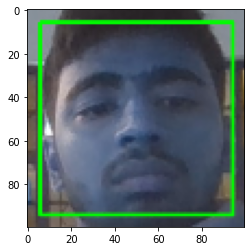

In [42]:
from matplotlib import pyplot as plt
plt.imshow(at, cmap='gray')
plt.show()

In [0]:
data=pd.DataFrame()

In [26]:
m={"Aditya":1,"Abhishek":0}
aditya=[]
abhi=[]
for i in range(0,41):
  aditya.append(1)
for i in range(0,58):
  abhi.append(0)
label=abhi+aditya
len(label)

99

In [0]:
from keras.utils import np_utils
y=np_utils.to_categorical(label)

(99, 100, 100, 3)

In [0]:
from keras.applications import DenseNet169
from keras import models
from keras.models import Sequential
from keras.layers import Dropout,Dense,Convolution2D, GlobalAveragePooling2D,Activation
model=Sequential([DenseNet169(include_top=False,input_shape=(100,100,3)),
                  Dropout(0.3),
                  Convolution2D(2, (3, 3), padding='valid'),
                  Activation('relu'),
                  GlobalAveragePooling2D(),
                  Activation('softmax')])

In [34]:
from keras.optimizers import Adam
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='mean_squared_error',
    metrics=['accuracy']
)
model.fit(face_data1,y,
          epochs=12,
          verbose=1,)

Epoch 1/12
99/99 [==============================] - 78s 787ms/step - loss: 0.1186 - accuracy: 0.8586
Epoch 2/12
99/99 [==============================] - 19s 189ms/step - loss: 0.0261 - accuracy: 0.9697
Epoch 3/12
99/99 [==============================] - 18s 187ms/step - loss: 6.2894e-06 - accuracy: 1.0000
Epoch 4/12
99/99 [==============================] - 18s 181ms/step - loss: 9.6387e-07 - accuracy: 1.0000
Epoch 5/12
99/99 [==============================] - 18s 184ms/step - loss: 0.0126 - accuracy: 0.9899
Epoch 6/12
99/99 [==============================] - 18s 186ms/step - loss: 5.5545e-07 - accuracy: 1.0000
Epoch 7/12
99/99 [==============================] - 18s 186ms/step - loss: 2.6357e-06 - accuracy: 1.0000
Epoch 8/12
99/99 [==============================] - 18s 187ms/step - loss: 4.2688e-05 - accuracy: 1.0000
Epoch 9/12
99/99 [==============================] - 19s 190ms/step - loss: 4.0370e-06 - accuracy: 1.0000
Epoch 10/12
99/99 [==============================] - 18s 186ms/step

In [0]:
model.save("face-classify.h5")